In [1]:
# Load Dataset

import json
import numpy as np
FILE_PATH = "./data/"
FILE_NAME = "log.json"
# dataDictList is a list of dicts
with open(FILE_PATH+FILE_NAME, 'r') as f:
    dataDictList = json.load(f)



In [2]:
# Global constants

PARTS =  {"nose" : 0, 
  "leftEye" : 1, 
  "rightEye" : 2, 
  "leftEar" : 3, 
  "rightEar" : 4, 
  "leftShoulder" : 5, 
  "rightShoulder" : 6, 
  "leftElbow" : 7, 
  "rightElbow" : 8, 
  "leftWrist" : 9, 
  "rightWrist" : 10, 
  "leftHip" : 11, 
  "rightHip" : 12, 
  "leftKnee" : 13, 
  "rightKnee" : 14, 
  "leftAnkle" : 15, 
  "rightAnkle" : 16}

requiredParts = ["nose", 
  "leftEye", 
  "rightEye", 
  "leftEar", 
  "rightEar", 
  "leftShoulder", 
  "rightShoulder", 
  "leftElbow", 
  "rightElbow", 
  "leftWrist", 
  "rightWrist", 
  "leftHip", 
  "rightHip", 
  "leftKnee", 
  "rightKnee", 
  "leftAnkle", 
  "rightAnkle"
]

IMAGE_X_SIZE = 600
IMAGE_Y_SIZE = 450



In [3]:
len(dataDictList[0]['keypoints'])



17

In [4]:
# Generate List that we want

dataListX = None
dataListY = None
for _frame in range(0,len(dataDictList)):
    if dataListX is None:
        print(_frame)
        dataListX = [[dataDictList[_frame]['keypoints'][PARTS[X]]['position']['x'] for X in requiredParts]]
        dataListY = [[dataDictList[_frame]['keypoints'][PARTS[X]]['position']['y'] for X in requiredParts]]
    else:
        dataListX = dataListX + [[dataDictList[_frame]['keypoints'][PARTS[_part]]['position']['x'] for _part in requiredParts]]
        dataListY = dataListY + [[dataDictList[_frame]['keypoints'][PARTS[_part]]['position']['y'] for _part in requiredParts]]



0


In [5]:
dataListX = np.array(dataListX) # [[x]]
dataListY = np.array(dataListY) # [[y]]
print(dataListX.shape, dataListY.shape)
newDataListX = np.reshape(dataListX, (-1,len(requiredParts))) 
newDataListY = np.reshape(dataListY, (-1,len(requiredParts))) #[#instance, (y) for each keypoint]
print(newDataListX.shape, newDataListY.shape)
newDataListX[:,0]

(61, 17) (61, 17)
(61, 17) (61, 17)


array([595.04864621, 296.12584974, 297.48656562, 296.91715748,
       296.48415223, 300.60493368, 302.49998623, 294.92643767,
       293.75848127, 594.71916909, 591.32597444, 591.86433658,
       284.32235112, 283.52755227, 280.0951797 , 284.27361799,
       285.67661912, 286.76513482, 288.18715896, 291.40215613,
       295.4949196 , 298.26800561, 300.98749587, 301.46960829,
       304.38456542, 306.5377468 , 308.09765221, 308.55954823,
       308.38091352, 306.42512269, 304.32576862, 300.41112331,
       296.30051241, 288.17843117, 282.68608645, 283.35313896,
       281.84942983, 281.1627487 , 276.83572423, 271.1531137 ,
       268.06853464, 266.43283995, 264.67256942, 267.20309413,
       268.06750156, 271.58736577, 273.41339753, 276.7805076 ,
       278.60447319, 279.84378372, 280.11748009, 281.48393137,
       282.37822703, 282.77144068, 283.92628758, 286.42663907,
       286.80289587, 287.6151503 , 287.73595004, 288.32908351,
       288.30973988])

In [6]:
# Normalization
'''
 This has 2 parts-
 Resize, by identifying and scaling as bounding box, and then (Min-Max) Normalize
 Note: The broadcasting here is element-wise. 
 Sources:
 [1] https://medium.com/tensorflow/move-mirror-an-ai-experiment-with-pose-estimation-in-the-browser-using-tensorflow-js-2f7b769f9b23
 [2] https://raw.githubusercontent.com/paulvollmer/posenet-keypoints-normalization/master/src/index.js
 

''' 

def scale(newDataListX, newDataListY):
    '''
    Assumes dataList of form [#instance, [(x,y) for each keypoint]]
    Possible optim: bounding box wont change much across frames
    '''
    # Bounding Box
    maxX = np.max(newDataListX[:], axis=1)
    minX = np.min(newDataListX[:], axis=1)
    maxY = np.max(newDataListY[:], axis=1)
    minY = np.min(newDataListY[:], axis=1)
    assert(len(minY)==len(dataListX))
    scaledDataX = newDataListX.copy()
    scaledDataY = newDataListY.copy()
    # Reset to Origin and Scale
    for _data in range(0, len(newDataListX)):
        scaledDataX[_data] = (newDataListX[_data] - minX[_data]) * (IMAGE_X_SIZE/((maxX[_data]-minX[_data])+10e-5))
        scaledDataY[_data] = (newDataListY[_data] - minY[_data]) * (IMAGE_Y_SIZE/((maxY[_data]-minY[_data])+10e-5))
    return scaledDataX, scaledDataY

scaledDataX, scaledDataY = scale(newDataListX, newDataListY)

In [7]:
scaledDataX[:,0]

array([599.99990451, 408.62127802, 410.62025669, 410.00519457,
       409.17901479, 421.54183154, 424.77065607, 212.17995317,
       161.92409738, 599.99986268, 553.6279084 , 538.99402458,
       170.50554009, 173.40133816, 161.00326976, 168.17013278,
       303.10743258, 296.52151105, 284.38385389, 164.20313723,
       173.63776357, 307.31190704, 168.26133922, 165.41925932,
       168.36648723, 171.37168143, 178.08697179, 294.03315576,
       279.39028537, 284.57425084, 282.88440133, 311.55879053,
       286.7719066 , 179.53322489, 162.12208573, 167.59593521,
       150.9224623 , 148.99633102, 141.52099712, 127.54217176,
       284.5584358 , 108.17504864, 108.24845799, 112.95156012,
       113.97204253, 117.6664334 , 120.39656078, 124.32814638,
       127.09893521, 129.88751989, 129.50189899, 131.64221094,
       136.47442082, 136.36624554, 137.2133744 , 139.33746853,
       141.52975476, 142.08824328, 140.87742412, 142.14517628,
       142.08963401])

<IPython.core.display.Javascript object>


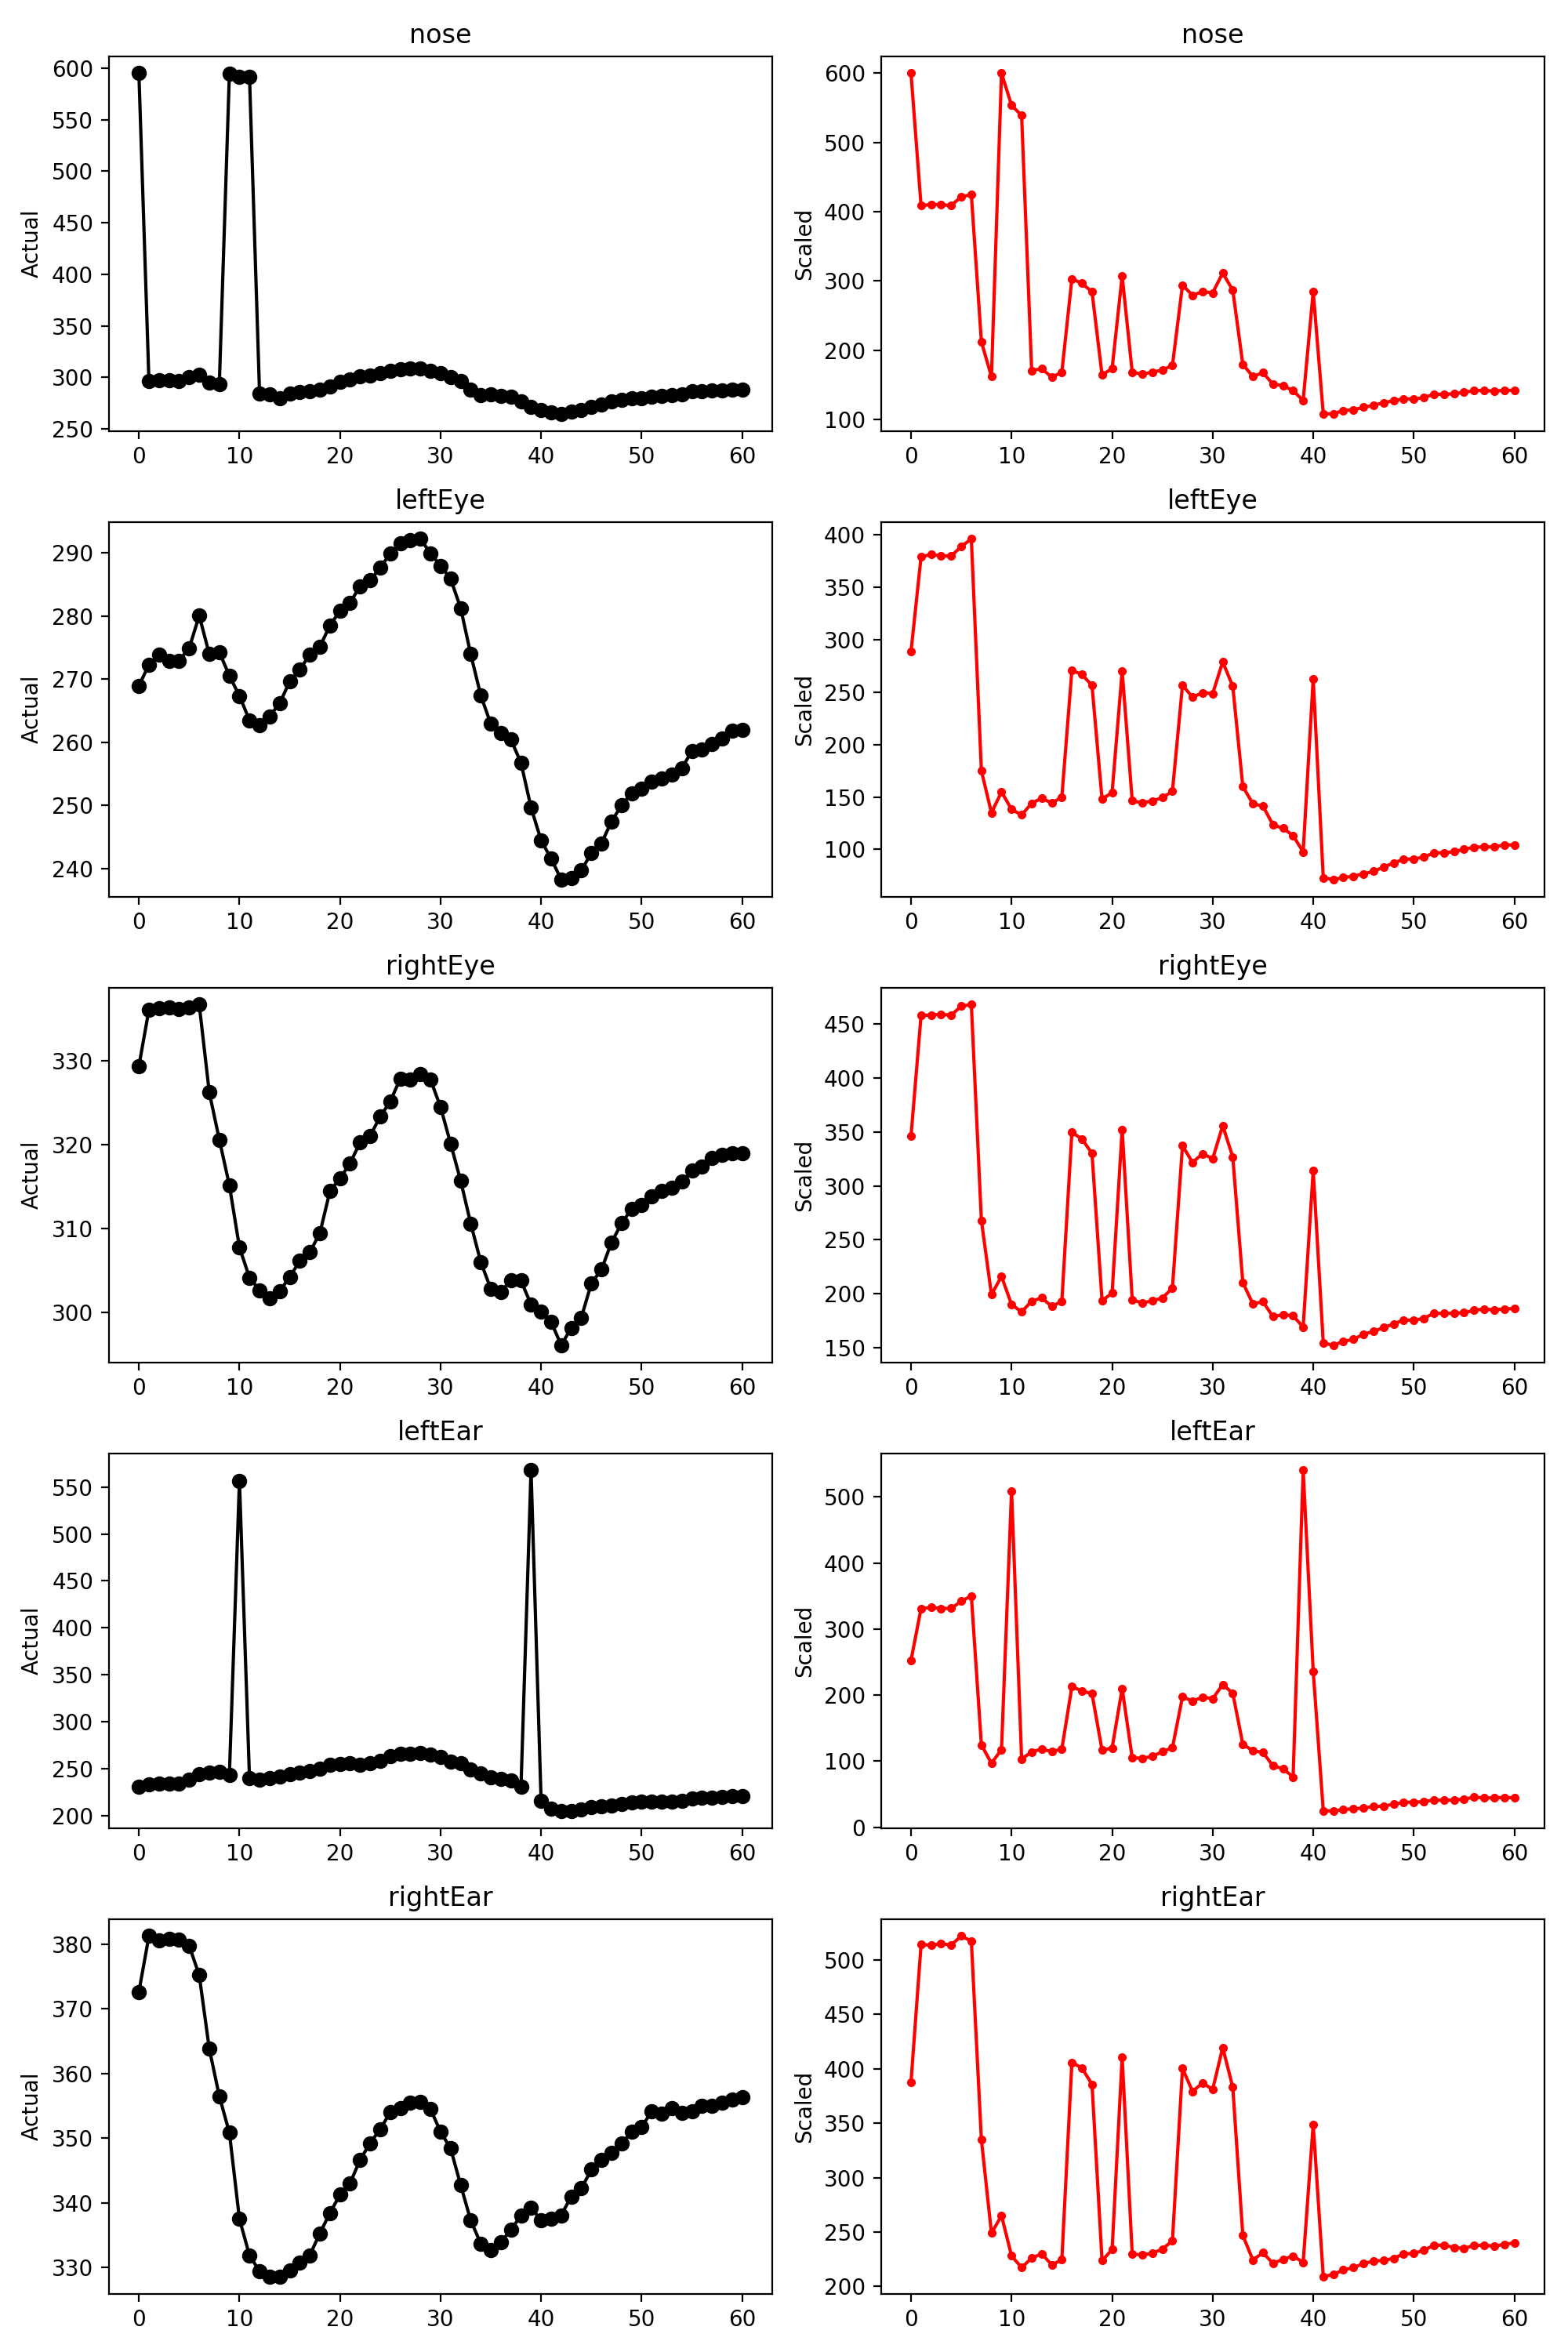

In [8]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 15), dpi= 80, facecolor='w', edgecolor='k')
num_graphs = 5
index = 0
for sub in range(0, num_graphs, 1):
    plt.subplot(5, 2, 2*sub+1)
    plt.plot(newDataListX[:,index], 'ko-')
    plt.title(requiredParts[index])
    plt.ylabel('Actual')

    plt.subplot(5, 2, 2*sub+2)
    plt.plot(scaledDataX[:,index],  'r.-')
    plt.title(requiredParts[index])
    plt.ylabel('Scaled')
    index = index + 1

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


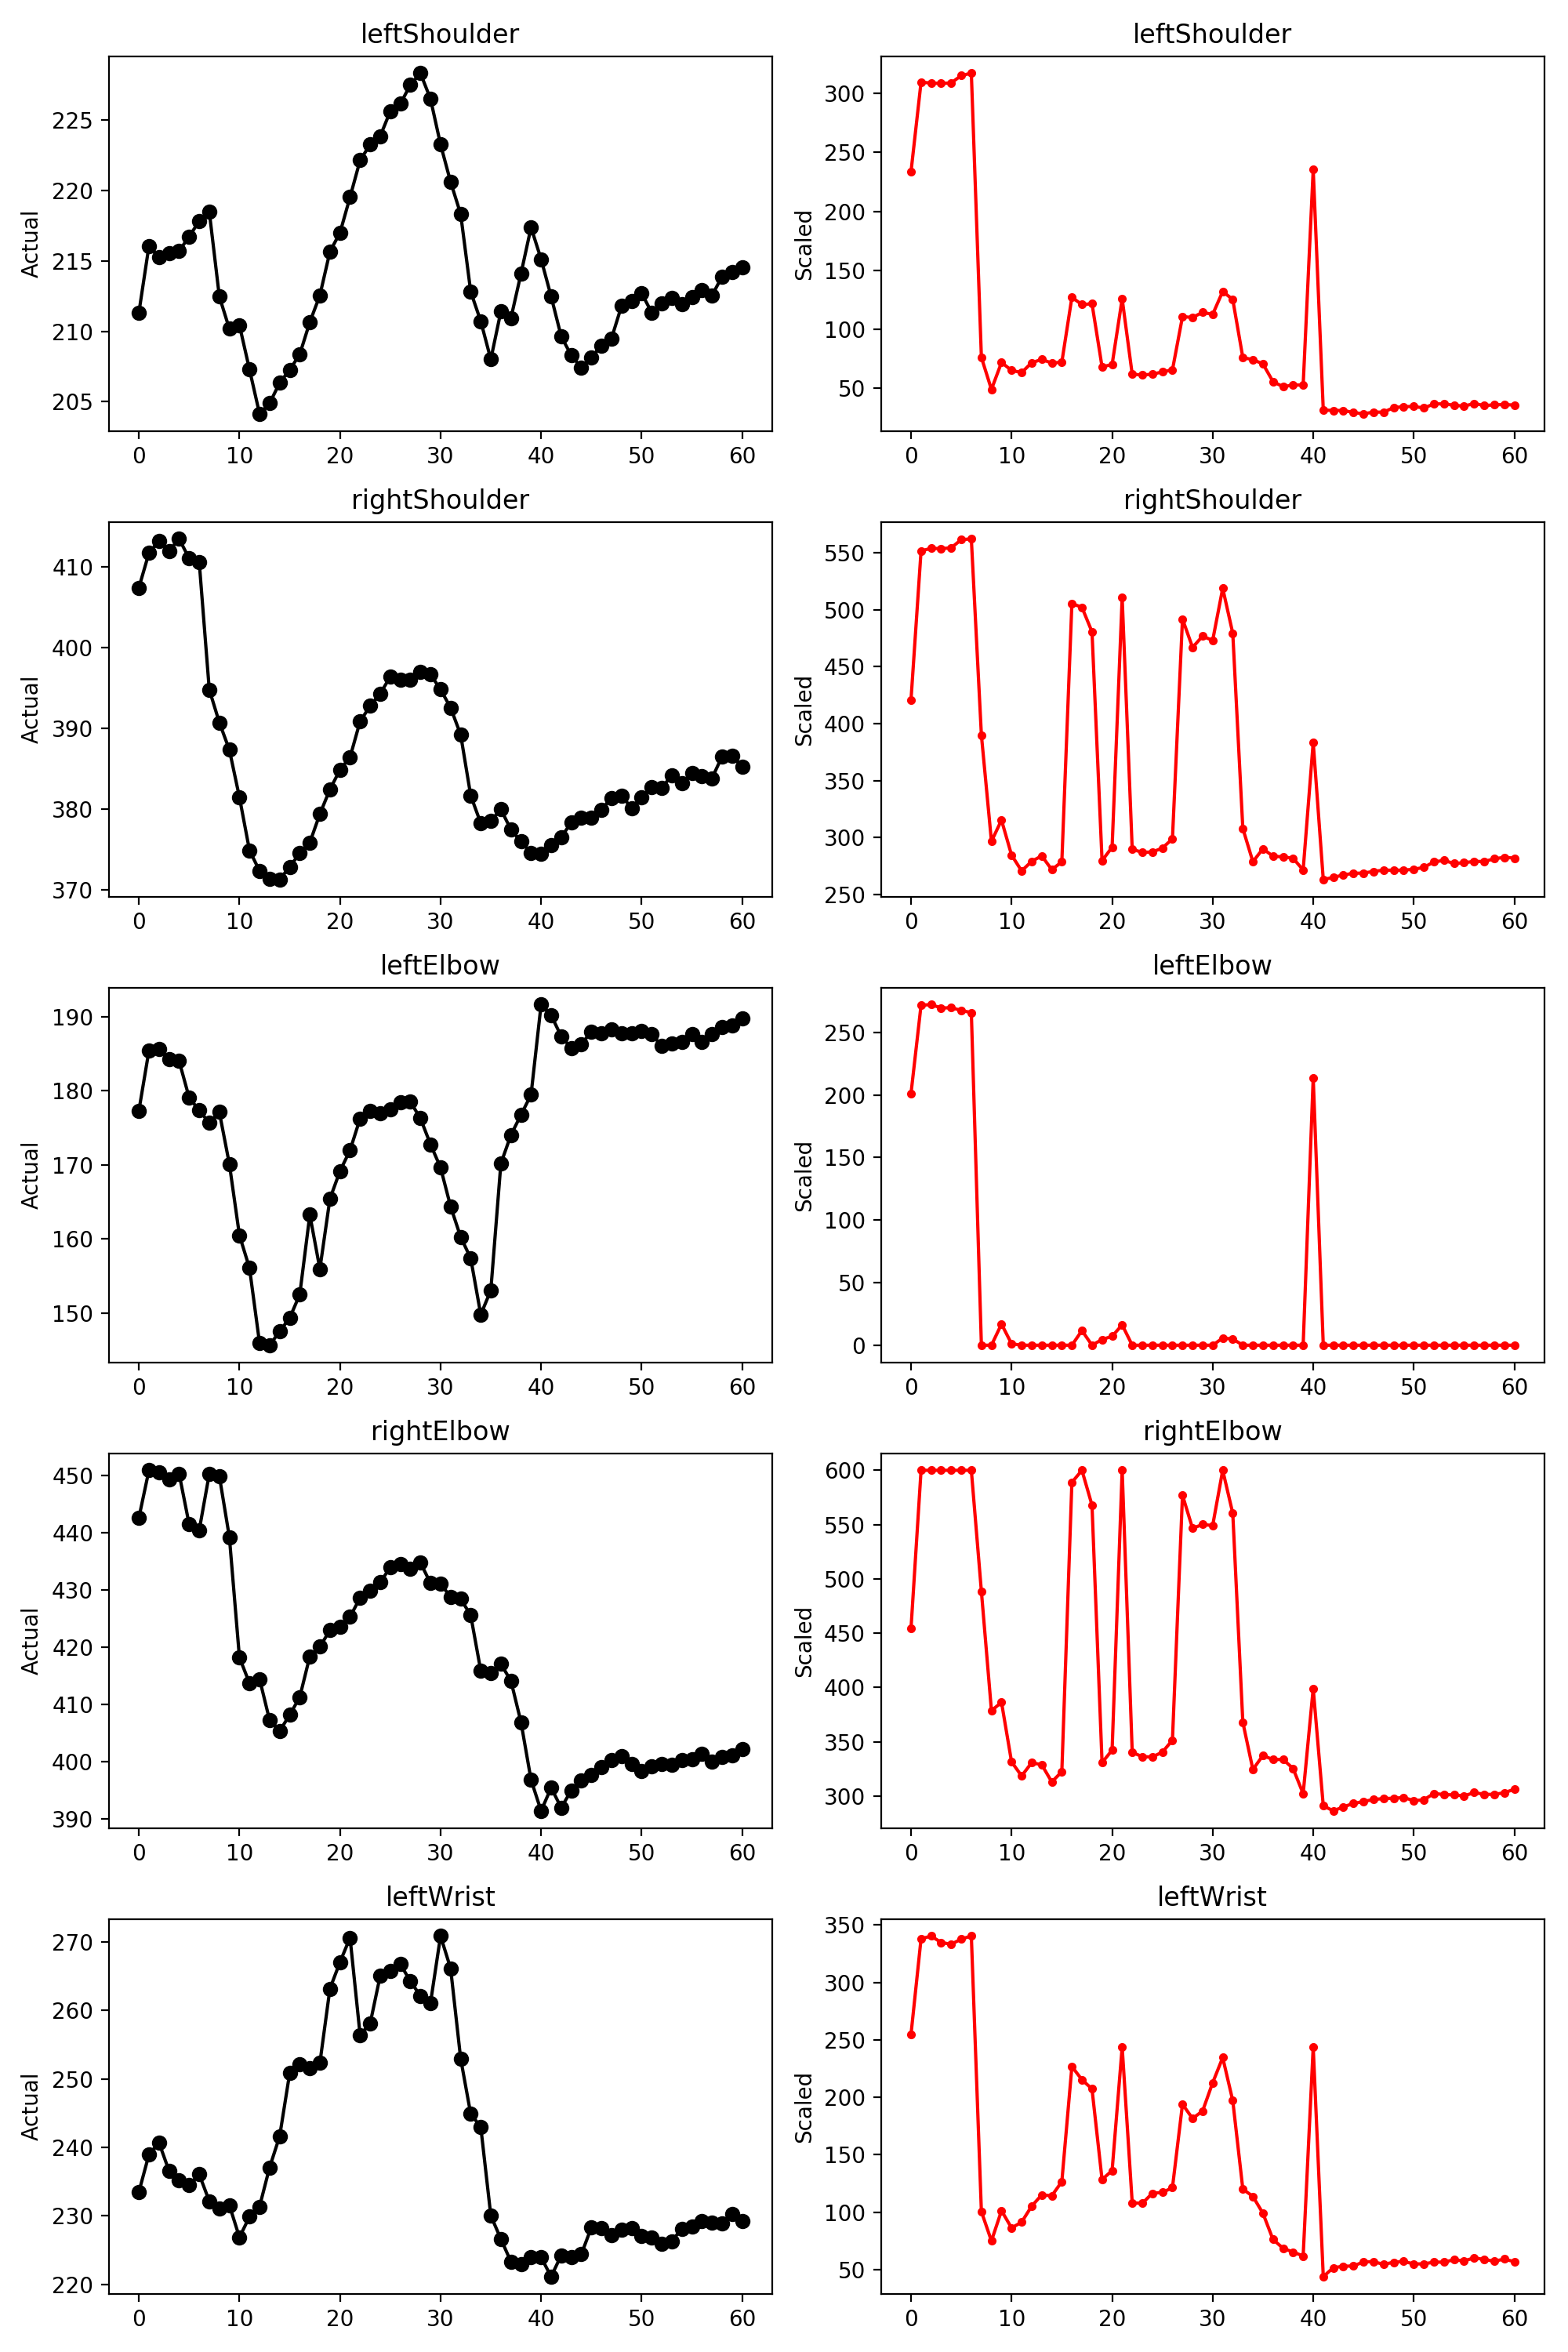

In [9]:
fig=plt.figure(figsize=(10, 15), dpi= 80, facecolor='w', edgecolor='k')
for sub in range(0, 5, 1):
    plt.subplot(5, 2, 2*sub+1)
    plt.plot(newDataListX[:,index], 'ko-')
    plt.title(requiredParts[index])
    plt.ylabel('Actual')
    plt.subplot(5, 2, 2*sub+2)
    plt.plot(scaledDataX[:,index],  'r.-')
    plt.title(requiredParts[index])
    plt.ylabel('Scaled')
    index = index+1
    
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


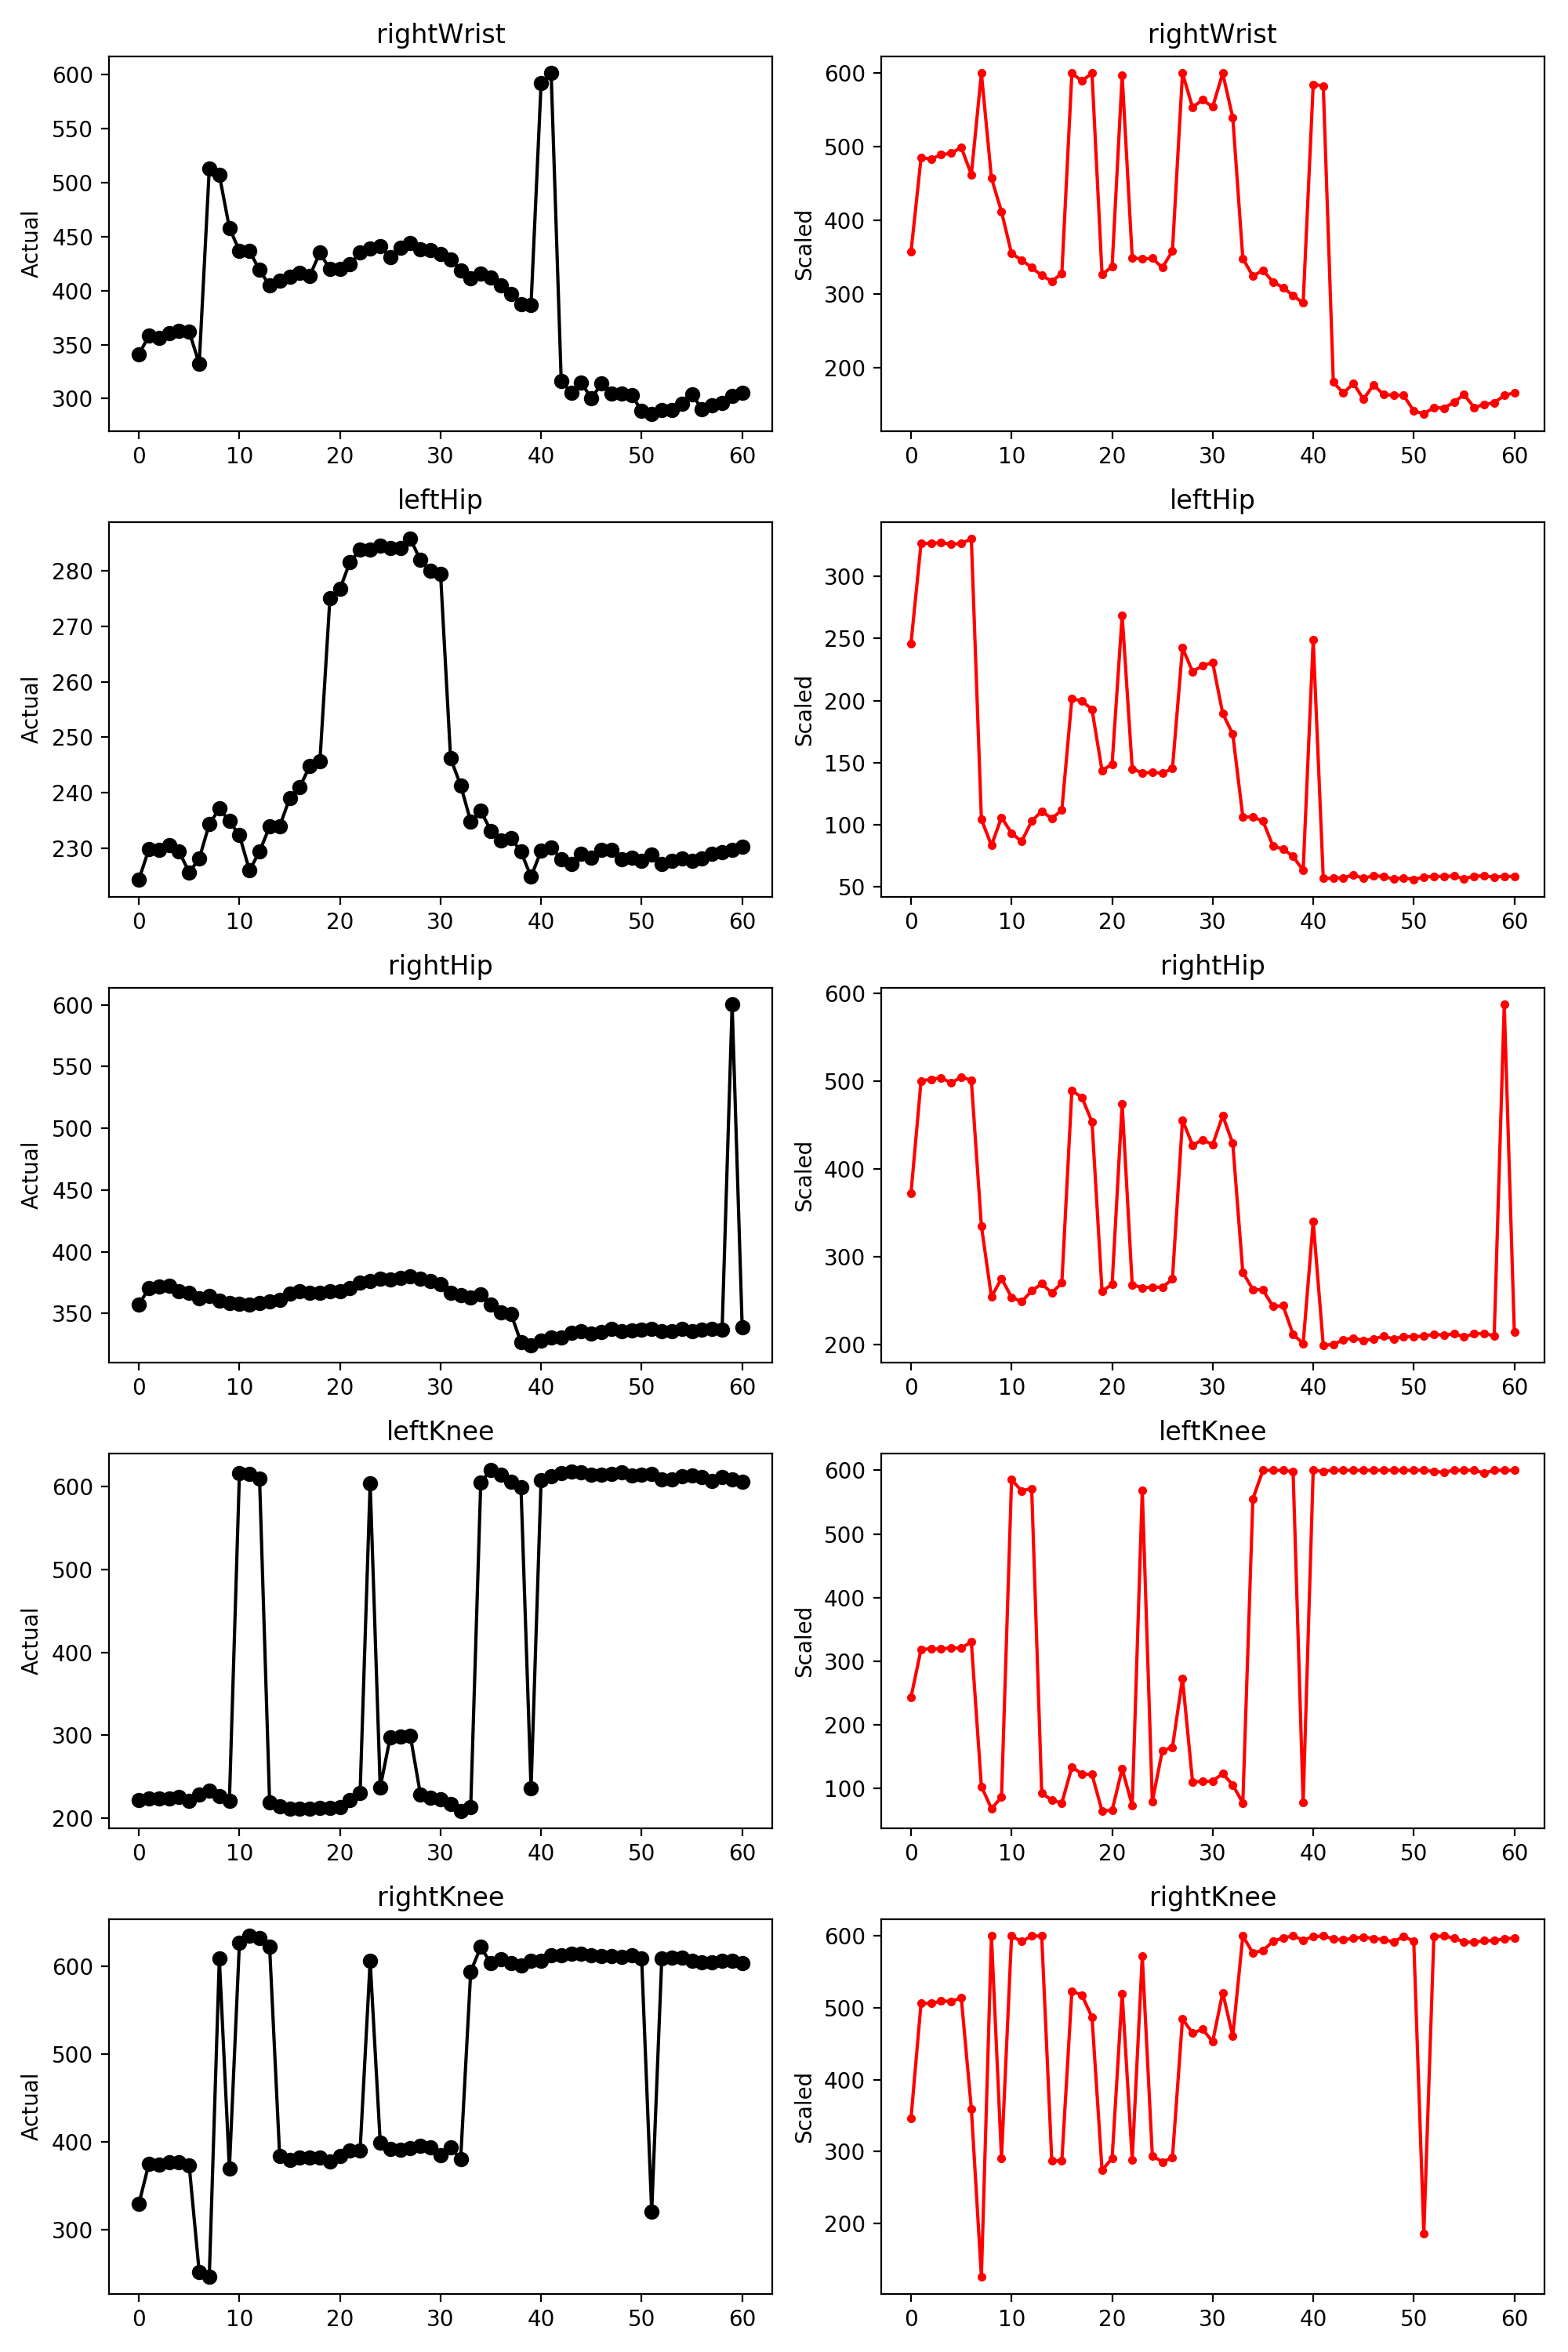

In [10]:
fig=plt.figure(figsize=(10, 15), dpi= 80, facecolor='w', edgecolor='k')
for sub in range(0, 5, 1):
    plt.subplot(5, 2, (2*sub+1))
    plt.plot(newDataListX[:,index], 'ko-')
    plt.title(requiredParts[index])
    plt.ylabel('Actual')
    plt.subplot(5, 2, (2*sub+2))
    plt.plot(scaledDataX[:,index],  'r.-')
    plt.title(requiredParts[index])
    plt.ylabel('Scaled')
    index = index+1
    
plt.tight_layout()
plt.show()